In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS



Usando WordCloud

In [37]:
import os
path = str(os.getcwd())
print(path)


C:\Users\Matheus\Desktop\DataScience\Projeto de KDD\Fact News Project


In [107]:
news_str = ' '

In [113]:
for index,rows in news.iterrows():
    news_str += str(rows['News'])
    news_str += str(' ')


In [118]:
len(news_str)

8128652

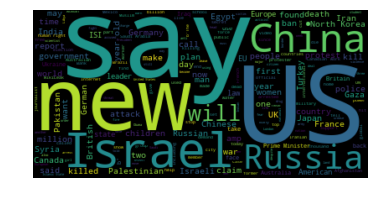

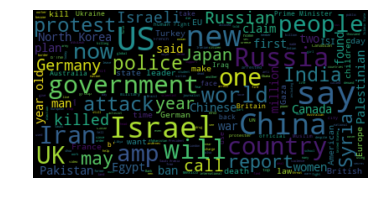

In [99]:
from os import path
from wordcloud import WordCloud

text = open(r'C:\Users\Matheus\Desktop\RedditNews.csv').read()

# Read the whole text.


# Generate a word cloud image
wordcloud = WordCloud().generate(text)
# Display the generated image:
# the matplotlib way:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()






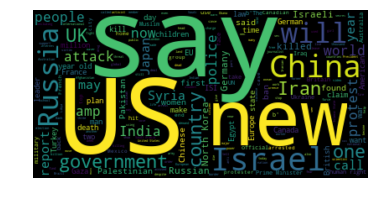

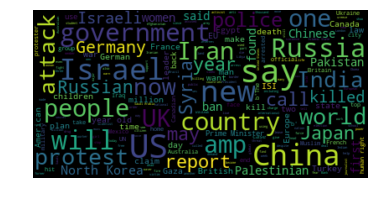

In [119]:
w2 = WordCloud().generate(news_str)

plt.imshow(w2, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
w2 = WordCloud(max_font_size=40).generate(news_str)
plt.figure()
plt.imshow(w2, interpolation="bilinear")
plt.axis("off")
plt.show()

Load db


In [3]:
news = pd.read_csv('RedditNews.csv')

In [98]:
news.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [4]:
downJones = pd.read_csv('DJIA_table.csv')

In [68]:
downJones.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
5,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000
6,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312
7,2016-06-22,17832.669922,17920.160156,17770.359375,17780.830078,89440000,17780.830078
8,2016-06-21,17827.330078,17877.839844,17799.800781,17829.730469,85130000,17829.730469
9,2016-06-20,17736.869141,17946.359375,17736.869141,17804.869141,99380000,17804.869141


Criação da coluna com a variação da bolsa no dia

In [5]:
downJones['var'] = (downJones['Close'] / downJones['Open']) -1


In [6]:
downJones['var'].max()

0.1093292980645828

Dia com a maior variação:

In [7]:
downJones['Date'][downJones['var'].idxmax()]


'2008-10-13'

Dia com a menor variação:

In [8]:
downJones['var'].min()


-0.077833475905268679

In [9]:
downJones['Date'][downJones['var'].idxmin()]


'2008-10-15'

Média:

In [10]:
downJones['var'].mean()

0.00036603579929290407

Verificar se colunas Close e Adj Close são todas iguais:

In [11]:
downJones[downJones['Close'] != downJones['Adj Close']].count()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
var          0
dtype: int64

Remover coluna Adj Close

In [12]:
downJones['Adj Close']

0       17949.369141
1       17929.990234
2       17694.679688
3       17409.720703
4       17140.240234
5       17400.750000
6       18011.070312
7       17780.830078
8       17829.730469
9       17804.869141
10      17675.160156
11      17733.099609
12      17640.169922
13      17674.820312
14      17732.480469
15      17865.339844
16      17985.189453
17      18005.050781
18      17938.279297
19      17920.330078
20      17807.060547
21      17838.560547
22      17789.669922
23      17787.199219
24      17873.220703
25      17828.289062
26      17851.509766
27      17706.050781
28      17492.929688
29      17500.939453
            ...     
1959    11388.440430
1960    11019.690430
1961    10609.660156
1962    11059.019531
1963    10917.509766
1964    11421.990234
1965    11433.709961
1966    11268.919922
1967    11230.730469
1968    11510.740234
1969    11220.959961
1970    11188.230469
1971    11532.879883
1972    11516.919922
1973    11543.959961
1974    11715.179688
1975    11502

In [13]:
downJones = downJones.drop('Adj Close', 1)


In [14]:
downJones.head()

,Date,Open,High,Low,Close,Volume,var
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,0.001402
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,0.012264
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,0.013672
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,0.012752
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,-0.012387


In [15]:
downJones.tail()

,Date,Open,High,Low,Close,Volume,var
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,0.007272
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,-0.008583
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,-0.011818
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,0.004491
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,0.026437


Ver se tem célula vazia

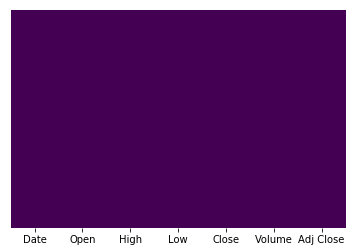

In [12]:
sns.heatmap(downJones.isnull(), yticklabels=False, cbar=False, cmap='viridis')

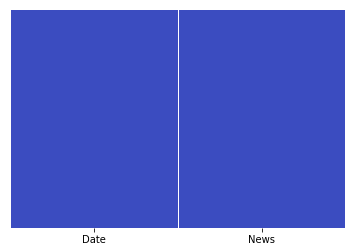

In [124]:
sns.heatmap(news.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [120]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73608 entries, 0 to 73607
Data columns (total 2 columns):
Date    73608 non-null object
News    73608 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


In [125]:
news.describe()

,Date,News
count,73608,73608
unique,2943,73537
top,2008-10-26,b'Why Russias response to Georgia was right'
freq,50,3


Verifica-se se há noticias iguais

In [142]:
news['News'].value_counts().head()

b'Why Russias response to Georgia was right'                                                                                                                                                                 3
Iceland Declares Independence from International Banks                                                                                                                                                       3
Nigerian finance minister's mother kidnapped                                                                                                                                                                 2
George Brandis refuses to back up claim that Snowden put lives at risk | Attorney general says he is aware of particular cases on the basis of intelligence briefings but will not reveal the information    2
Syria: Attack on military facility was a 'declaration of war' by Israel                                                                                                     

Visualização de dados da bolsa:

Histograma dos valores

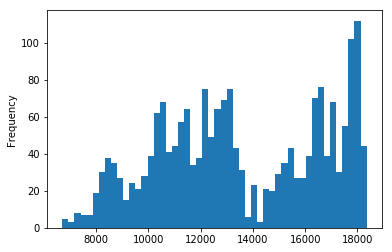

In [20]:
downJones['High'].plot.hist(bins =50)

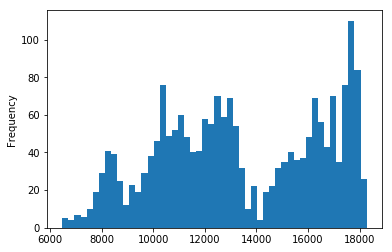

In [21]:
downJones['Low'].plot.hist(bins =50)

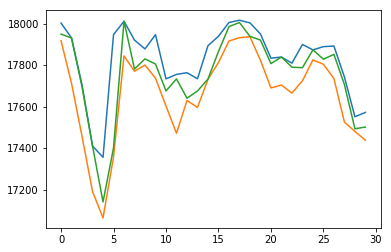

In [31]:
plt.plot(downJones['High'].head(30))
plt.plot(downJones['Low'].head(30))
plt.plot(downJones['Close'].head(30))


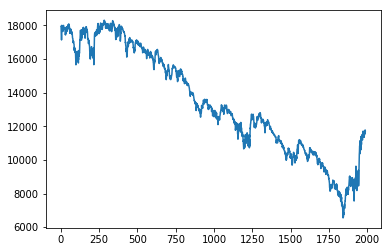

In [45]:
plt.plot(downJones['Close'])


Verificar quais as noticias presentes no dia em que houve maior alta percentual

In [23]:
news[news['Date'] == downJones['Date'][downJones['var'].idxmax()]
]['News']






70408               b'EU Bans the Incandescent Light Bulb'
70409      b'AFP: Paul Krugman wins Nobel Economics Prize'
70410     b'Europe to U.S.: You messed up the rescue, too'
70411       b'Hindu Threat to Christians: Convert or Flee'
70412    b'Europe puts $2.3 trillion on line for banks,...
70413    b'Congratulations on your Nobel Prize in Econo...
70414    b"When can we get some damn privacy? Governmen...
70415    b'AFRICA: Sexually-transmitted grades kills qu...
70416    b'New Beijing Traffic Laws Take 800,000 Cars O...
70417    b'A Jamaican lottery scam draws in millions of...
70418            b'Terror bill: 42-day detention rejected'
70419                   b"Ringo 'too busy' for autographs"
70420       b'EU warns youth: turn your MP3 players down!'
70421    b'For three decades the Free Aceh Movement fou...
70422    b' North Korea restores U.N. monitoring of ato...
70423    b"Aids in Africa: The power of the pulpit's me...
70424    b'AskReddit: Out of all the significant world .

Verificar quais as noticias presentes no dia em que houve maior queda percentual

In [29]:
news[news['Date'] == downJones['Date'][downJones['var'].idxmin()]]['News']

70358    b'On behalf of the 64% of Canadians who did no...
70359    b"China will be a democracy by 2020, according...
70360             b"Iceland: Britain's unlikely new enemy"
70361    b'CFR Member Calls For New Global Monetary Aut...
70362          b'How to engineer a financial catastrophe.'
70363    b'Suicide spurs bid to regulate the Internet i...
70364    b'Australia: Muslim Students Group Outraged Af...
70365    b'President of Honduras Calls for Drug Legaliz...
70366    b'Conservative government re-elected, CBC proj...
70367    b"Rabbits Overrun Nelson Mandela's Jail of 18 ...
70368    b'Thai and Cambodian soldiers fire bullets and...
70369    b'CNN: Re-election Projected for Canadian PM S...
70370          b'Brazil saves penguins. Yay for penguins!'
70371    b"Muslim convert Joseph Thomas took ticket, ca...
70372                      b"Canada's vote against change"
70373    b'...a Saudi woman initiated a boycott campaig...
70374    b'Iceland receiving assistance from Nordic cou.

Noticias do dia que a bolsa teve maior valor de fechamento

In [28]:
news[news['Date'] == downJones['Date'][downJones['Close'].idxmax()]
]['News']

10200    World Cup sponsors urged to bail over 'horrifi...
10201    ThePirateBay.se and PirateBay.se have been seized
10202    A US appeals court has ruled that YouTube shou...
10203    Child abuser sentence reduced because 6 year o...
10204    A Turkish woman who has been taking part in a ...
10205    'Home-brewed morphine' made possible - Scienti...
10206    Campaigners say 3,000 workers will die before ...
10207    Bloody, nightmarish scenes: Between 100 and 20...
10208    China is planning the first-ever landing on th...
10209    Billionaire Russian businessman found dead out...
10210    Retired Fisheries and Oceans Canada biologist ...
10211    Oxford University rules out investing in coal ...
10212    Moscow Admits Two Fighters Captured in Ukraine...
10213    Kerry: Internet 'Needs Rules to Be Able to Flo...
10214    Surrogate father who abandoned baby with down ...
10215    Saudi Arabia Is Hiring 8 New Executioners  Sau...
10216    Nigeria: Women and girls captured by Boko Hara.

Noticias do dia que a bolsa teve menor valor de fechamento

In [30]:
news[news['Date'] == downJones['Date'][downJones['Close'].idxmin()]
]['News']

66708    b'Kim Jong-Il wins re-election with 99.9% of t...
66709    b'The Norton Antivirus cover-up: A mysterious ...
66710    b"Indias New Face:  Meet the pro-business anti...
66711    b"Dalai Lama warns Tibetans are 'near extincti...
66712    b'Official Website of North Korea: "Is North K...
66713    b'Israel at it again, this time pillaging reso...
66714    b'Pirate Party Politician Fired for His Politi...
66715    b" Dalai Lama: China makes life 'hell on Earth...
66716    b'New Zealand\'s RIAA tries to justifiy new "G...
66717    b'"Under President Obamas plan, up to 50,000 U...
66718    b'Heroin use is killing Russia, most of heroin...
66719    b'Chinese attempt to instigate collision with ...
66720    b'Mideast: Home Demolitions Threaten Peace Talks'
66721    b'Policeman killed in third fatal shooting in ...
66722    b'Astounding story about the obstaclesthugs, s...
66723    b'Chile and Argentina unite against UK Antarct...
66724    b'The legitimacy of International Criminal Cou.